**K-means clustering blog - points to cover**

- Different approaches to clustering networks 
- Go over the steps on how the algorithm works 
- How are clusters evaluated 
- How to find the right k 
- Discuss intra class similarity and interclass similarity
- Describe the tuning parameters in scikit-learns implementation of k-means clustering

In [65]:
from sklearn.cluster import KMeans
from sklearn.metrics import calinski_harabasz_score
import numpy as np

In [66]:
import pandas as pd
import matplotlib.pyplot as plt

In [67]:
df = pd.read_csv('bankloans.csv')

In [68]:
df.dropna(inplace = True)

In [69]:
features = ['ed','creddebt']
X = df[features].values

**Kmeans function** - this function is to test which is the best value of clusters 

In [70]:
def k_means(k):
    lst = []
    for i in range(2,k+1):
        kmeans = KMeans(n_clusters = i, init = 'k-means++')
        results = kmeans.fit(X)
        lst.append(results)
    return lst

In [71]:
k_list = k_means(6)

**Using Calinski Score to determine the best k**

In [80]:
def ch_scores(kmeans_list):
    scores = []
    for i in kmeans_list:
        labels = i.labels_
        scores.append(calinski_harabasz_score(X, labels))
    return scores

In [81]:
ch_scores = ch_scores(k_list)

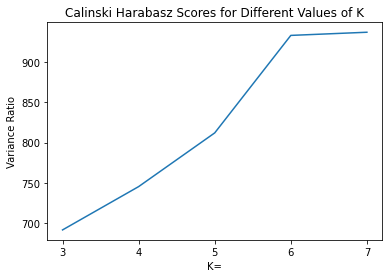

In [88]:
plt.plot([3, 4, 5, 6, 7], ch_scores)
plt.xticks([3,4,5,6,7])
plt.title('Calinski Harabasz Scores for Different Values of K')
plt.ylabel('Variance Ratio')
plt.xlabel('K=')
plt.show()

**Within Cluster Sum of Squares**

In [84]:
def wcss(kmeans_lst):
    
    wcss_score = []
    
    for i in kmeans_lst:
        labels = i.labels_
        wcss_score.append(i.inertia_)
    
    return wcss_score

In [85]:
wcss_score = wcss(k_list)

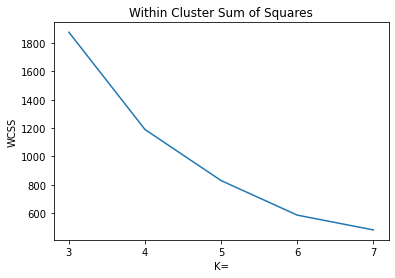

In [86]:
plt.plot([3, 4, 5, 6, 7], wcss_score)
plt.xticks([3,4,5,6,7])
plt.title('Within Cluster Sum of Squares')
plt.ylabel('WCSS')
plt.xlabel('K=')
plt.show()